# EDA

## Initialization

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\anaconda\envs\geopandas_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns

import igraph

from geopandas import GeoDataFrame
from pyrosm import OSM

In [3]:
# Self-made modules
import helpers as hp

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Inputs

In [5]:
buildings_int_path = '../data/02_intermediate/buildings_data/'
plz_ags_csv = '../data/01_raw/zuordnung_plz_ort_landkreis.csv'

# Demographics
ags_living_csv = '../data/01_raw/de_living_2019.csv'
ags_population_csv = '../data/01_raw/de_population_2019.csv'

In [6]:
ags_living = pd.read_csv(ags_living_csv, 
                         sep = ';', 
                         encoding = 'cp1250', 
                         dtype= {'1_Auspraegung_Code':str},
                         low_memory = False)
ags_population = pd.read_csv(ags_population_csv, 
                             sep = ';', 
                             dtype= {'1_Auspraegung_Code':str},
                             encoding = 'cp1250', 
                             low_memory = False)

In [7]:
# Contain local AGS codes (no regional)
plz_ags = pd.read_csv(plz_ags_csv, dtype= {'plz': str, 'ags': str})

AGS Living

In [8]:
ags_living.rename(columns = {'1_Auspraegung_Code':'ags',
                            '1_Auspraegung_Label':'place',
                            '2_Auspraegung_Label':'indication',
                            '2_Merkmal_Label':'measurement_type'}, inplace = True)

In [16]:
# Filter to get only local AGS codes
ags_living = ags_living[ags_living.ags.isin(plz_ags.ags)]

In [17]:
ags_living.ags.nunique()

10796

AGS Population

In [20]:
ags_population.rename(columns = {'1_Auspraegung_Code':'ags',
                                 '1_Auspraegung_Label':'place',
                                 '2_Auspraegung_Label':'gender',
                                 '3_Auspraegung_Label':'age_group'}, inplace = True)

# Filter to get only local AGS codes
ags_population = ags_population[ags_population.ags.isin(plz_ags.ags)]

In [21]:
ags_population.ags.nunique()

10796

In [22]:
ags_population[ags_population.ags == '01004000']

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,ags,place,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,gender,3_Merkmal_Code,3_Merkmal_Label,3_Auspraegung_Code,age_group,BEVSTD__Bevoelkerungsstand__Anzahl
162,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT000B03,unter 3 Jahre,2145
163,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT003B06,3 bis unter 6 Jahre,2167
164,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT006B10,6 bis unter 10 Jahre,2814
165,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT010B15,10 bis unter 15 Jahre,3726
166,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT015B18,15 bis unter 18 Jahre,2268
167,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT018B20,18 bis unter 20 Jahre,1893
168,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT020B25,20 bis unter 25 Jahre,4826
169,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT025B30,25 bis unter 30 Jahre,5098
170,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT030B35,30 bis unter 35 Jahre,5157
171,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT035B40,35 bis unter 40 Jahre,4657


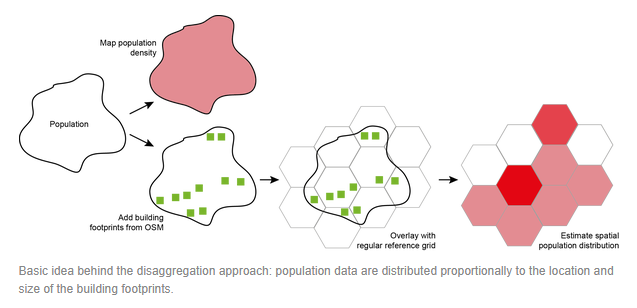

## Plot examples

In [ ]:
id = 10

In [ ]:
df = pd.read_csv(os.path.join(buildings_int_path,name_list[id]))
boundary_id = name_list[id].split('.')[0].split('_')[2]
boundary_id

In [23]:
# Haar
df = pd.read_csv(os.path.join(buildings_int_path, 'buildings_ags_09184123.csv'))
boundary_id = '09184123'

In [24]:
df.shape

(3969, 18)

In [25]:
df.building_types.value_counts()

residential          2700
to_be_classified      808
accessory_storage     328
public                 66
commercial             49
industrial             11
accessory_supply        4
other                   3
Name: building_types, dtype: int64

## Get the number of residential buildings from officials

In [26]:
ags_living['place'] = ags_living['place'].apply(lambda x: x.strip())

In [33]:
# Total buildings in the area that are classified as "residentials"
official_res_count = int(ags_living[(ags_living.ags == boundary_id) &
                                    (ags_living.measurement_type == 'Wohngebäude nach Anzahl der Wohnungen') &
                                    (ags_living.indication == 'Insgesamt')].BAUNW9__Wohngebaeude__Anzahl.iloc[0])
official_res_count

2994

In [49]:
ags_place = ags_living[ags_living.ags == boundary_id].place.iloc[0]
ags_place

'Haar'

In [28]:
osm_res_count = df[df.building_types == 'residential'].shape[0]
osm_res_count

2700

In [50]:
# differences in number
abs_diff = abs(osm_res_count-official_res_count)
# diff in percentage
pct_diff = round((abs_diff/official_res_count)*100,2)

In [56]:
f'{abs_diff} buildings & {pct_diff}% diff'

'294 buildings & 9.82% diff'

In [83]:
def get_diff_residential_count(ags_living: pd.DataFrame, ags_osm: pd.DataFrame, boundary_id: str):
    """
    Calculate the difference between area's official residential buildings count vs OSM count

    Args:
        ags_living: official residential buildings dataset from Germany Statistical Office
        ags_osm: preprocessed data in a AGS (municipal) area from OSM and Geofabrik with preliminary classification for building types
        boundary_id: AGS code of the area

    Results:
        Collection of boundary_id, ags_place, osm_count, official_count, abs_diff, pct_diff
    """
    
    # Official residential buildings count
    official_count = int(ags_living[(ags_living.ags == boundary_id) &
                                        (ags_living.measurement_type == 'Wohngebäude nach Anzahl der Wohnungen') &
                                        (ags_living.indication == 'Insgesamt')].BAUNW9__Wohngebaeude__Anzahl.iloc[0])
    # get AGS name
    ags_place = ags_living[ags_living.ags == boundary_id].place.iloc[0]
    
    # OSM residential buildings count
    osm_count = ags_osm[ags_osm.building_types == 'residential'].shape[0]
    
    # differences in number
    abs_diff = abs(osm_count-official_count)
    # diff in percentage
    pct_diff = round((abs_diff/official_count)*100,2)
    
    # Generate result list
    res_list = [boundary_id, ags_place, osm_count, official_count, abs_diff, pct_diff]
    
    return pd.DataFrame(res_list,
                       index = ['ags', 'ags_place', 'osm_count', 'official_count', 'abs_diff', 'pct_diff']).T
    

In [84]:
get_diff_residential_count(ags_living, df, boundary_id)

,ags,ags_place,osm_count,official_count,abs_diff,pct_diff
0,09184123,Haar,2700,2994,294,9.82


# DEV

Get diff distribution of real residential buildings vs osm buildings

In [97]:
residential_diff_path = '../data/08_reporting/residential_diff.csv'

In [90]:
from shapely import wkt
# Filter out NaN
df = df[df.geometry.isna() == False].reset_index(drop = True)

# Convert geometry to GeoSeries
df['geometry'] = df['geometry'].apply(wkt.loads)
# Convert to GeoPandas type
df_geo = GeoDataFrame(df, geometry='geometry')

In [91]:
df_geo = hp._swap_2_cols(df_geo, 'id','center.lon')
df_geo = hp._swap_2_cols(df_geo, 'type','center.lat')

df_geo.rename(columns = {'center.lat':'lat',
                        'center.lon':'lon'}, inplace = True)

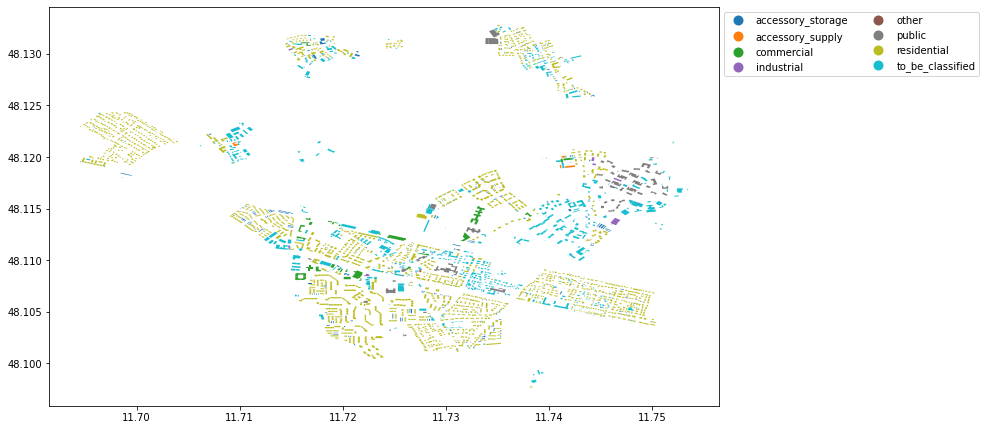

In [96]:
# Plot
ax =   df_geo.plot(column='building_types', 
                   markersize=3, 
                   figsize=(12,20), 
                   legend=True, 
                   legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))